In [15]:
# Imports necesarios
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [25]:
# Carga el conjunto de datos desde un archivo CSV
df = pd.read_csv('drive/MyDrive/diabetes/diabetes_dataset.csv')

In [86]:
# Definir las características (features) y las etiquetas (labels)
features = df.drop(columns=['Class variable (0 or 1)'])
labels = df['Class variable (0 or 1)']

In [87]:
# Estandarizar los datos
scaler = StandardScaler()
features_rescaled = scaler.fit_transform(features)

In [88]:
# Sobremuestreo para tener control del desequilibrio de clases
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features_rescaled, labels)

In [89]:
# Seccionar el conjunto de datos en entrenamiento (70%) y prueba (30%)
features_train, features_test, labels_train, labels_test = train_test_split(features_resampled, labels_resampled, test_size=0.3, random_state=42, stratify=labels_resampled)

In [ ]:
# Ajuste de hiperparámetros para Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
gb_classifier.fit(features_train, labels_train)

In [93]:
# Calcular y mostrar la precisión en el conjunto de prueba
labels_pred_gb = gb_classifier.predict(features_test)
accuracy_gb = accuracy_score(labels_test, labels_pred_gb)
print("Precisión del Gradient Boosting en el conjunto de prueba:", accuracy_gb)

Precisión del Gradient Boosting en el conjunto de prueba: 0.8533333333333334


In [94]:
# Mostrar el informe de clasificación en el conjunto de prueba
print("Informe de clasificación en el conjunto de prueba:")
print(classification_report(labels_test, labels_pred_gb))

Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.84      0.88      0.86       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [95]:
# Calcular y mostrar la matriz de confusión en el conjunto de prueba
confusion_gb = confusion_matrix(labels_test, labels_pred_gb)
print("Matriz de Confusión en el conjunto de prueba:")
print(confusion_gb)

Matriz de Confusión en el conjunto de prueba:
[[124  26]
 [ 18 132]]


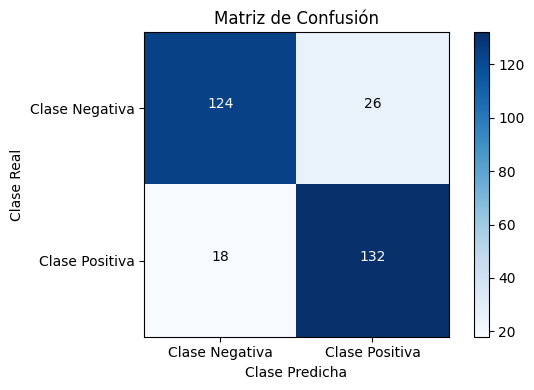

In [96]:
# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 4))
plt.imshow(confusion_gb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()

class_labels = ["Clase Negativa", "Clase Positiva"]
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(confusion_gb[i][j]), horizontalalignment="center", color="white" if confusion_gb[i][j] > confusion_gb.max() / 2 else "black")

plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")

plt.tight_layout()
plt.show()

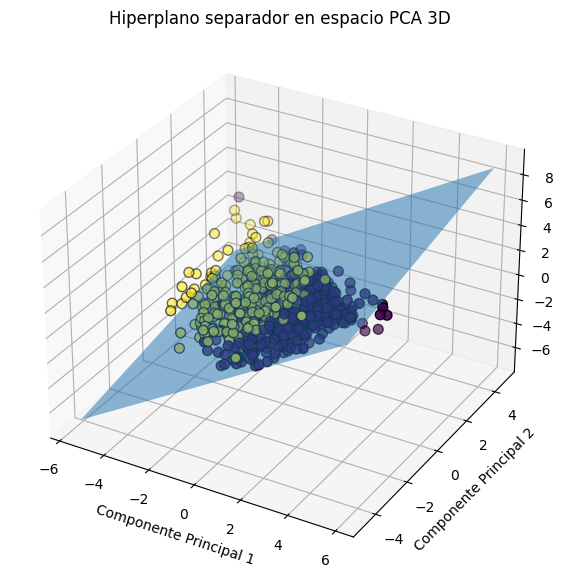

In [97]:
# Estandarizar y aplicar PCA para 3 componentes
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(df)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_rescaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Entrenar regresión logística
logreg = LogisticRegression()
logreg.fit(principal_df, labels)

# Visualizar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotear el hiperplano
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)

# Plotear los puntos
ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=labels, edgecolors='k', s=50, marker='o', depthshade=True)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Hiperplano separador en espacio PCA 3D')

plt.show()